In [1]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from io import StringIO
from pytz import timezone
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime as dt

%matplotlib inline

In [2]:
lines_by_author = pd.read_csv(
    "/home/zsherman/pyart-gitstats-statistics/lines_of_code_by_author.dat",
    sep='\s+', header=None)

authors = (['time', 'Jonathan J. Helmus', 'Scott Collis', 'Kirk North',
            'Anderson Gama', 'Gama Anderson', 'Nick Guy', 'Joseph C. Hardin',
            'Timothy Lang', 'Cory C Weber', 'Steve Nesbitt', 'Jordi Figueras',
            'kmuehlbauer', 'Kai Muehlbauer', 'Eric Bruning', 'Anderson',
            'snesbitt', 'Joe VanAndel', 'Alex Kleeman', 'striges',
            'Cody Piersall'])

colors = ['#000000', '#0080ff', '#2a3050', '#f0ff00', '#00ff7c', '#d100ce',
          '#dd3333', '#00ce18', '#7f9690', '#df85ff', '#96b813', '#2533fb',
          '#66d4ff', '#fd7f00', '#9f5000', '#ff0000', '#4d0c57', '#900303',
          '#00780e', '#41fd30', '#dae700']

In [3]:
lines_by_author.columns = authors

In [3]:
lines_by_author

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1347039986,0,156,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1347383833,0,197,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1347384117,0,198,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1347384410,0,199,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1347384612,0,2605,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1349361015,0,3072,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1350413299,0,3200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1350413456,0,5508,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1350413522,0,5517,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1350413802,0,5553,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
lines_epoch_array = np.asanyarray(lines_by_author['time'].values)
lines_time_array = pd.to_datetime(lines_epoch_array,  unit='s')
lines_time_array

DatetimeIndex(['2012-09-07 17:46:26', '2012-09-11 17:17:13',
               '2012-09-11 17:21:57', '2012-09-11 17:26:50',
               '2012-09-11 17:30:12', '2012-10-04 14:30:15',
               '2012-10-16 18:48:19', '2012-10-16 18:50:56',
               '2012-10-16 18:52:02', '2012-10-16 18:56:42',
               ...
               '2016-08-22 20:38:50', '2016-08-22 20:43:12',
               '2016-08-22 21:04:51', '2016-08-22 21:25:26',
               '2016-08-23 14:27:48', '2016-08-23 14:47:42',
               '2016-08-29 16:13:44', '2016-08-29 18:03:54',
               '2016-08-29 18:16:41', '2016-08-29 18:57:38'],
              dtype='datetime64[ns]', length=1780, freq=None)

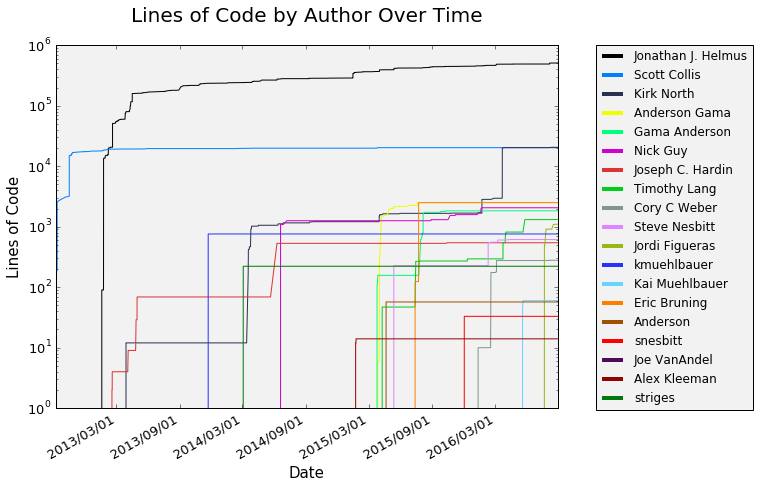

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7.2
fig = plt.figure()
ax = lines_by_author.iloc[:, 1:20].plot(
    fontsize=13, x=lines_time_array, logy=True,
    color=colors, legend=True)

# Converting datetime.datetime objects to the correct format for matplotlib to work with.
date_format = mdates.DateFormatter('%Y/%m/%d')

ax.xaxis.set_major_formatter(date_format)
ax.set_axis_bgcolor('#f2f2f2')

legend = plt.legend(bbox_to_anchor=(1.4, 1.017))
legend.get_frame().set_facecolor('#f2f2f2')
for legobj in legend.legendHandles:
    legobj.set_linewidth(4.0)

plt.ylabel('Lines of Code', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Lines of Code by Author Over Time', fontsize=20, y=1.05)
plt.savefig(
    '/home/zsherman/pyart-roadmap/roadmap/images/lines_authors_overtime.png',
    bbox_inches='tight')


In [6]:
commits_by_author = pd.read_csv("/home/zsherman/pyart-gitstats-statistics/commits_by_author.dat",
                                sep='\s+', header=None)

In [7]:
commits_by_author.columns = authors

In [8]:
commits_epoch_array = np.asanyarray(commits_by_author['time'].values)
commits_time_array = pd.to_datetime(commits_epoch_array,  unit='s')
commits_time_array

DatetimeIndex(['2012-09-07 17:46:26', '2012-09-11 17:17:13',
               '2012-09-11 17:21:57', '2012-09-11 17:26:50',
               '2012-09-11 17:30:12', '2012-10-04 14:30:15',
               '2012-10-16 18:48:19', '2012-10-16 18:50:56',
               '2012-10-16 18:52:02', '2012-10-16 18:56:42',
               ...
               '2016-08-22 20:38:50', '2016-08-22 20:43:12',
               '2016-08-22 21:04:51', '2016-08-22 21:25:26',
               '2016-08-23 14:27:48', '2016-08-23 14:47:42',
               '2016-08-29 16:13:44', '2016-08-29 18:03:54',
               '2016-08-29 18:16:41', '2016-08-29 18:57:38'],
              dtype='datetime64[ns]', length=1780, freq=None)

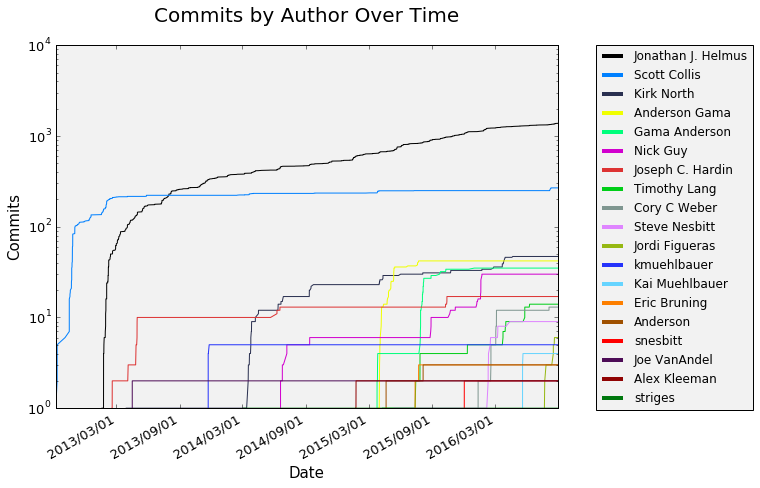

In [9]:
rcParams['figure.figsize'] = 9, 7.2
fig = plt.figure()
ax = commits_by_author.iloc[:, 1:20].plot(
    fontsize=13, logy=True, x=commits_time_array,
    color=colors, legend=True)

# Converting datetime.datetime objects to the correct format for matplotlib to work with.
date_format = mdates.DateFormatter('%Y/%m/%d')
ax.xaxis.set_major_formatter(date_format)
ax.set_axis_bgcolor('#f2f2f2')

legend = plt.legend(bbox_to_anchor=(1.4, 1.017))
legend.get_frame().set_facecolor('#f2f2f2')
for legobj in legend.legendHandles:
    legobj.set_linewidth(4.0)

plt.ylabel('Commits', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Commits by Author Over Time', fontsize=20, y=1.05)
plt.savefig(
    '/home/zsherman/pyart-roadmap/roadmap/images/commits_authors_overtime.png',
    bbox_inches='tight')
plt.show()

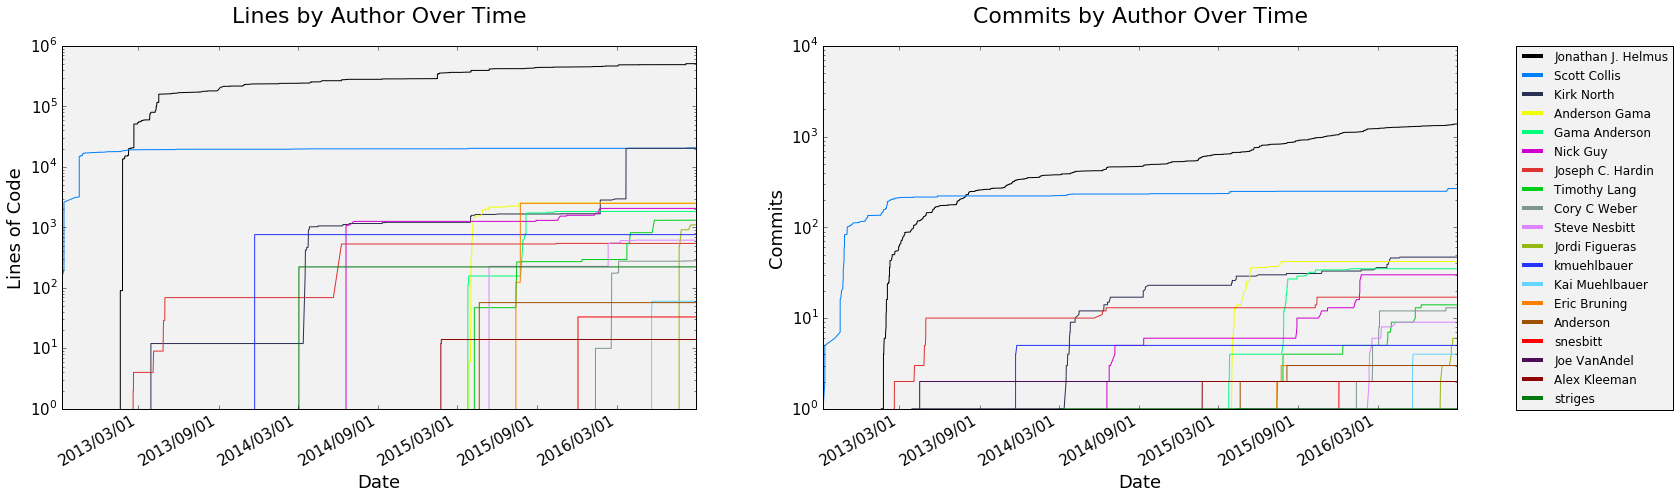

In [20]:
rcParams['figure.figsize'] = 25, 7.2
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1 = lines_by_author.iloc[:,1:20].plot(
    ax=axes[0], fontsize=15, x=lines_time_array, logy=True,
    color=colors, legend=False)

ax1.set_ylabel('Lines of Code', fontsize=18)
ax1.set_xlabel('Date', fontsize=18)
ax1.set_title('Lines by Author Over Time', fontsize=22, y=1.05)

ax2 = commits_by_author.iloc[:,1:20].plot(
    ax=axes[1], fontsize=15, logy=True, x=commits_time_array,
    color=colors, legend=True)
ax2.set_title('Commits by Author Over Time', fontsize=22, y=1.05)
ax2.set_ylabel('Commits', fontsize=18)
ax2.set_xlabel('Date', fontsize=18)
# Converting datetime.datetime objects to the correct format for matplotlib to work with.
date_format = mdates.DateFormatter('%Y/%m/%d')
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1, l1, loc=2)
ax1.xaxis.set_major_formatter(date_format)
ax1.set_axis_bgcolor('#f2f2f2')

ax2.xaxis.set_major_formatter(date_format)
ax2.set_axis_bgcolor('#f2f2f2')

legend = plt.legend(bbox_to_anchor=(1.35, 1.017))


legend.get_frame().set_facecolor('#f2f2f2')

for legobj in legend.legendHandles:
    legobj.set_linewidth(4.0)

plt.savefig(
    '/home/zsherman/pyart-roadmap/roadmap/images/combined_lines_commits_overtime.png',
    bbox_inches='tight')

In [11]:
lines_over_time = pd.read_csv(
    "/home/zsherman/pyart-gitstats-statistics/lines_of_code.dat",
    sep='\s+', header=None)

In [12]:
epoch_array = np.asanyarray(lines_over_time[0].values)
time_array = pd.to_datetime(epoch_array,  unit='s')
lines_over_time['Date'] = time_array
lines_over_time = lines_over_time.set_index(lines_over_time['Date'], drop=True)

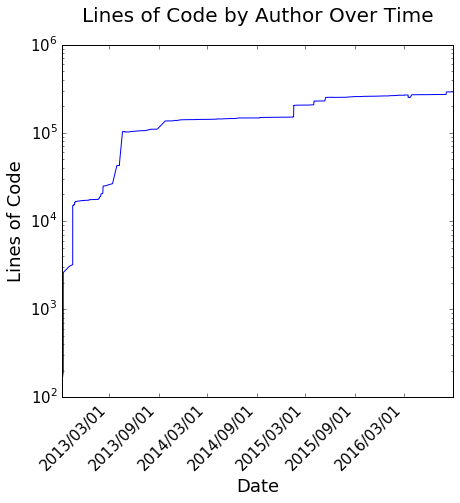

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = lines_over_time.iloc[:, 1].plot(logy=True, fontsize=15, rot=45)

# Converting datetime.datetime objects to the correct format for matplotlib to work with.

date_format = mdates.DateFormatter('%Y/%m/%d')
min_x = time_array[0]
max_x = time_array[488]
ax.set_xlim(min_x, max_x)

ax.xaxis.set_major_formatter(date_format)

plt.ylabel('Lines of Code', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('Lines of Code by Author Over Time', fontsize=20, y=1.05)
plt.savefig('/home/zsherman/pyart-roadmap/roadmap/images/lines_overtime.png',
            bbox_inches='tight')
plt.show()